# Project 1

In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics


%matplotlib inline

In [2]:
# Read in data

data = pd.read_csv('https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/diabetes2.csv')

## Linear Regression

Can you predict BMI based on other features in the dataset?

1. Explore the Data
2. Build your Model
    - Build a Linear Regression Model using train_test_split() for your cross-validation
    - Standardize your continuous predictors
3. Evaluate your model
    - How did your model do? What metrics do you use to support this?
4. Interpret the coefficients to your model
    - In the context of this problem, what do the coefficients represent?
  


### 1 – Explore Data

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [227]:
data.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [229]:
data.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

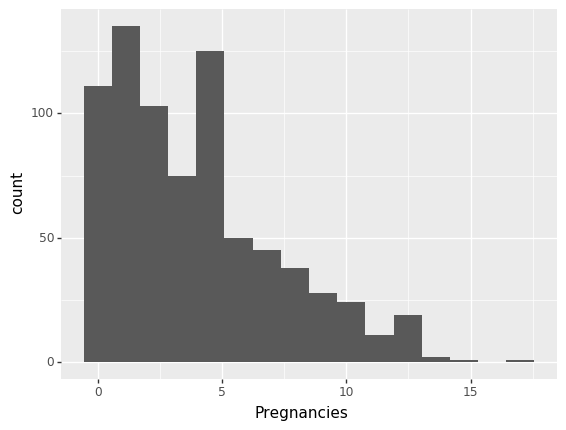

<ggplot: (7549948005)>

In [233]:
(ggplot(data, aes('Pregnancies')) +
geom_histogram())

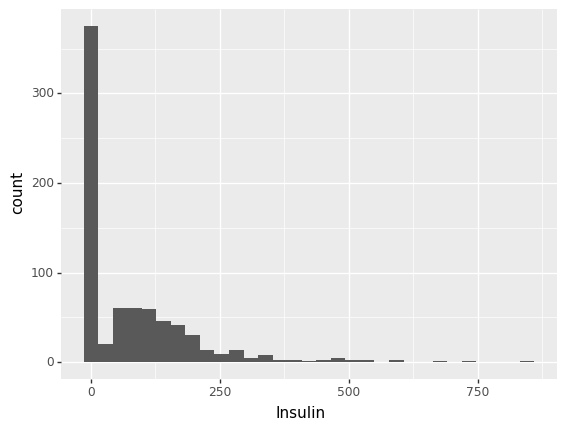

<ggplot: (7549588777)>

In [234]:
(ggplot(data, aes('Insulin')) +
geom_histogram())

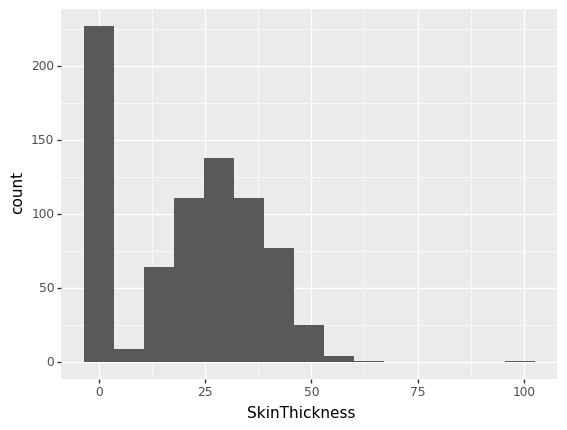

<ggplot: (7548102893)>

In [235]:
(ggplot(data, aes('SkinThickness')) +
geom_histogram())

### 2 – Build Model

In [5]:
# Split 

predictors = ['BloodPressure','Insulin','Age','Glucose','Pregnancies', 'SkinThickness']

X_train, X_test, y_train, y_test = train_test_split(data[predictors], data["BMI"], test_size=0.2)

In [6]:
# Standardize

zScore = StandardScaler()
zScore.fit(X_train)
Xz_train = zScore.transform(X_train)
Xz_test = zScore.transform(X_test) 

In [7]:
# Fit

model = LinearRegression()
model.fit(Xz_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Predict

y_pred = model.predict(Xz_test)
y_pred[1:10]

array([34.11216055, 23.54528922, 28.74205786, 31.63508272, 35.57533967,
       29.63298518, 36.74229741, 22.6737246 , 35.42091456])

### 3 – Evaluate Model

In [9]:
true_vs_pred = pd.DataFrame({"predict": y_pred,"trueV": y_test})
true_vs_pred.head()

,predict,trueV
307,31.674974,24.8
691,34.112161,42.3
78,23.545289,43.2
80,28.742058,22.4
668,31.635083,34.0


In [10]:
model.score(Xz_test, y_test)

0.2680026486648397

In [11]:
model.score(Xz_train,y_train)

0.21713964199127322

In [12]:
mean_squared_error(y_test, y_pred)

37.52375248654191

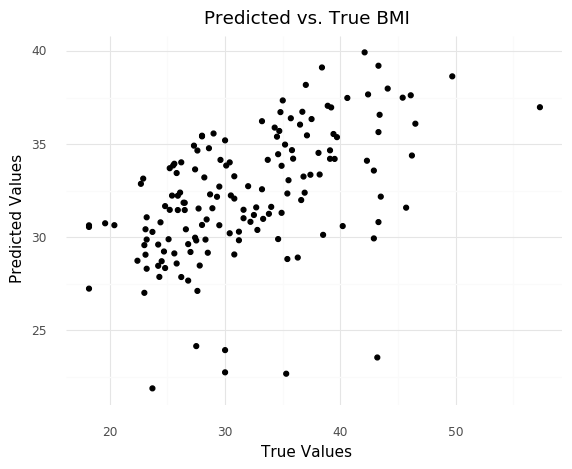

<ggplot: (7547459061)>

In [147]:
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + 
 geom_point() +
 theme_minimal() +
 labs(x = "True Values", y = "Predicted Values", title = "Predicted vs. True BMI"))

How did your model do? What metrics do you use to support this?

My model did okay. The r2 and MSE aren't very high. I should have probably put in more predictors to make the model better and have better scores

### 4 – Interpret Coefficients

In [14]:
# Coefficients

coef = pd.DataFrame({"coef":model.coef_, "names":predictors})
coef

,coef,names
0,1.671171,BloodPressure
1,-0.314993,Insulin
2,-0.217311,Age
3,1.459501,Glucose
4,-0.034476,Pregnancies
5,2.679495,SkinThickness


In the context of this problem, what do the coefficients represent?

1 unit increase in Blood Pressure is associated with the 1.671171 increase in BMI  

1 unit increase in Insulin is associated with the 0.314993 decrease in BMI

1 unit increase in Age is associated with the 0.217311 decrease in BMI

1 unit increase in Glucose is associated with the 1.459501 increase in BMI

1 unit increase in Pregnancies is associated with the 0.034476 decrease in BMI

1 unit increase in Skin thickness is associated with the 2.679495 increase in BMI



## Logistic Regression

Can you predict Diabetes (Outcome) based on other features in the dataset?

1. Explore the Data (if using different variables from Linear Regression)
2. Build your Model
    - Build a Logistic Regression Model using cross-validation
       - What cross-val method did you choose, why?
    - Standardize your continuous predictors
3. Evaluate your model
    - How did your model do? What metrics do you use to support this?
  

### 1 – Explore Data 

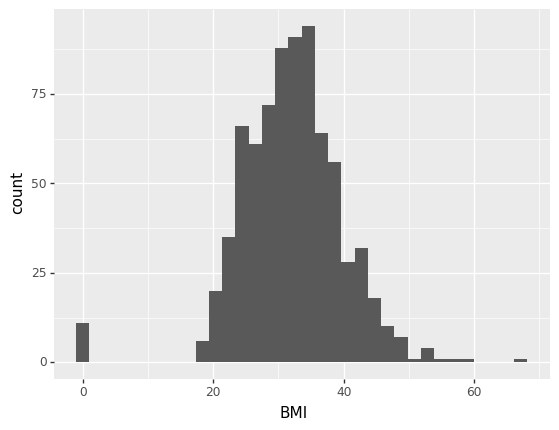

<ggplot: (7548102821)>

In [236]:
(ggplot(data, aes('BMI')) +
geom_histogram())

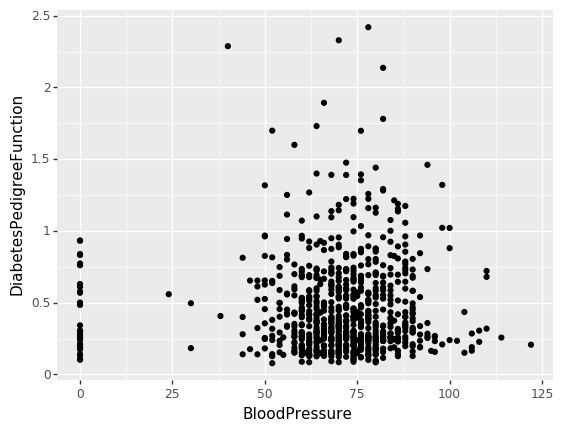

<ggplot: (7548091997)>

In [238]:
(ggplot(data, aes('BloodPressure','DiabetesPedigreeFunction')) +
geom_point())

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2 – Build Model

In [381]:
# Kfold

X = data[['BloodPressure','Insulin','Age','Glucose','Pregnancies']]
y = data["Outcome"]

# create k-fold object
kf = KFold(n_splits = 5)
kf.split(X)

lr = LogisticRegression() #model

acc = [] #empty list to store accuracy for each fold

matrix = []  #empty list to store confusion matrix of each fold


In [379]:
# Use a for loop to loop through each fold and train a model, then add the accuracy to acc.

for train_indices, test_indices in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y[train_indices]
    y_test  = y[test_indices]
    
    #standardize
    zscore = StandardScaler()
    zscore.fit(X_train)
    Xz_train = zscore.transform(X_train)
    Xz_test = zscore.transform(X_test)
    
    # model
    model = lr.fit(Xz_train, y_train)
    
    # record accuracy
    acc.append(accuracy_score(y_test, model.predict(Xz_test)))
    
    # confusion matrix
    matrix.append(confusion_matrix(y_test, model.predict(Xz_test)))
        
    
#print overall acc
print(acc)
    

[0.7272727272727273, 0.6753246753246753, 0.7727272727272727, 0.803921568627451, 0.7712418300653595]


### 3 – Evaluate Model

In [60]:
print(np.mean(acc))

0.750097614803497


In [380]:
print(matrix)

[array([[84, 16],
       [26, 28]]), array([[75, 15],
       [35, 29]]), array([[89,  8],
       [27, 30]]), array([[101,  13],
       [ 17,  22]]), array([[89, 10],
       [25, 29]])]


What cross-val method did you choose, why?

I chose k-fold because leave one out would have been compuationally expensive. The data set has 700+ rows so running my code multiple times would take a long time. 

How did your model do? What metrics do you use to support this?

My model did very good. From the accuracy scores of the k fold models the mean is 75%. This means that my model is about 75% accurate when it comes to predicting if someone has diabetes. 

## Data Viz

Based on your new understanding of the data create 2 graphs using ggplot/plotnine. These should **not** be graphs you made in the Explore phase of either the Logistic or Linear Regression portion.

Make sure you include at **least** 3 out of these 5 elements in your at least one of your graphs:

1. Custom x-axis labels, y-axis labels and titles
2. Fill and/or Color by a variable
3. Use facet_wrap()
4. Layer multiple geoms
5. Change the theme of your graph (see: https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme.html)


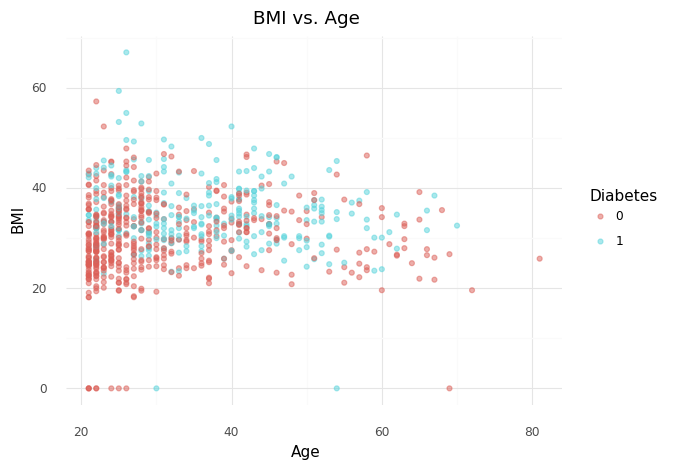

<ggplot: (7548865237)>

In [220]:
(ggplot(data, aes("Age", "BMI", color="factor(Outcome)")) + 
geom_point(alpha = 0.5, size = 1.5) +
 theme_minimal() +
labs(title = "BMI vs. Age", color = "Diabetes"))

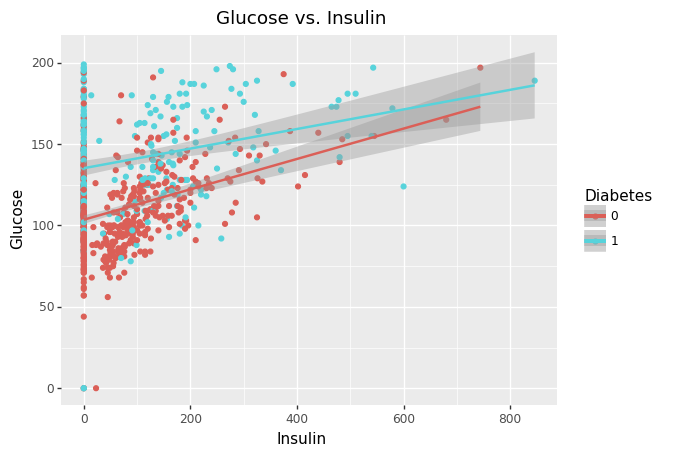

<ggplot: (7548248049)>

In [219]:
(ggplot(data, aes('Insulin', 'Glucose', color="factor(Outcome)")) +
 geom_point() +
theme(legend_key=element_rect(fill='#666666', alpha=.3)) +
geom_smooth(method='lm') +
labs(title = "Glucose vs. Insulin", color = "Diabetes"))